In [1]:
import gym
import gym_anytrading
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

Trying to test gym_anytrading to check if worth it.

Still understanding what ticks do, noticed the default dataset had too many hours within a day so I made a quick script to get only midnight values ->  FOREX_EURUSD_1H_ASK_DAILY.csv

The frame_bound selects how many rows will be taken into consideration, window_size how many we will take into account each step.

        action = env.action_space.sample()

Seems to ask for a random action 

Apparently we can extend these env to configure extra things. Including "with your desired policies for calculating reward, profit, fee, etc."

Things to read:

https://github.com/AminHP/gym-anytrading

https://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb


Todos

- [ ] Can we make our measures work




info: {'total_reward': -222.50000000000097, 'total_profit': 0.9890909500843923, 'position': 0}


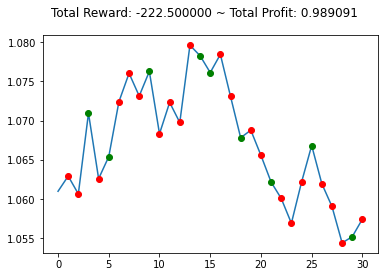

In [28]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("FOREX_EURUSD_1H_ASK_DAILY.csv")
env = gym.make('forex-v0', df=df,frame_bound=(10, 40), window_size=1)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

obs = []

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    obs.append({"obs":observation[0]})
    #env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()